In [7]:
import numpy as np


def calculate_scale(tensor1, tensor2):
    """
    Calculate the scaling factor to make the sums of tensor1 and tensor2 as close as possible.

    Args:
        tensor1 (numpy.ndarray): A 4D tensor of shape (B, C, H, W).
        tensor2 (numpy.ndarray): A 4D tensor of shape (B, C, H, W).

    Returns:
        int: Scaling factor to scale tensor2 to match tensor1.
    """
    # Sum all values across each tensor
    sum_tensor1 = np.sum(tensor1, axis=(1, 2, 3))  # Sum over H, W dimensions
    sum_tensor2 = np.sum(tensor2, axis=(1, 2, 3))  # Sum over H, W dimensions

    # Calculate scale factors for each batch and channel
    scale_factors = sum_tensor1 / sum_tensor2

    # Average scaling factor across all batches and channels
    scale = np.mean(scale_factors)

    # Convert to integer for uniform scaling
    return int(round(scale))



tensor1 = np.random.randint(0, 2, size=(4, 3, 256, 256))
tensor2 = np.random.randint(0, 2, size=(4, 3, 256, 256))

scale = calculate_scale(tensor1, tensor2)
print(f"Calculated scale: {scale}")


Calculated scale: 1


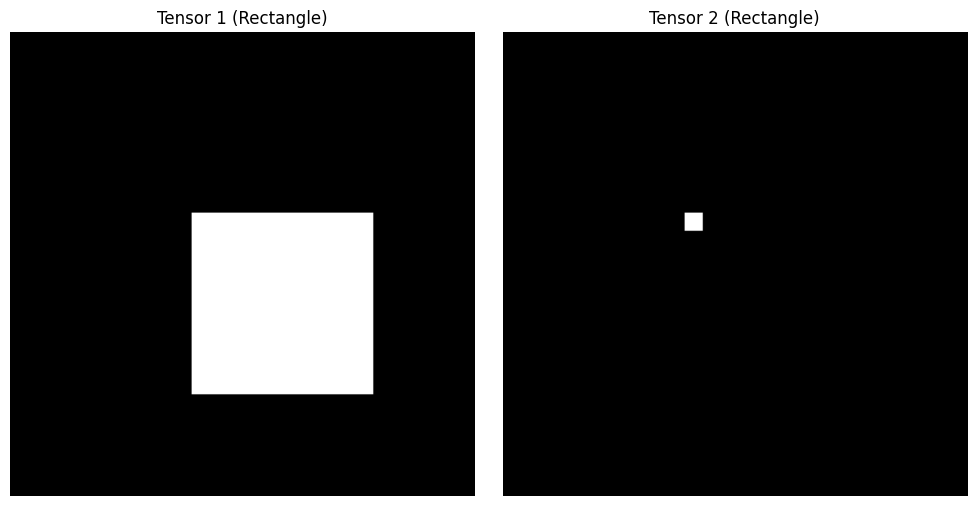

In [9]:
import matplotlib.pyplot as plt

def draw_rectangle_on_tensor(tensor, top_left, bottom_right, value=1):
    """
    Draw a rectangle on a given tensor.
    
    Args:
        tensor (numpy.ndarray): The 2D tensor (H, W) to draw on.
        top_left (tuple): The (row, col) of the top-left corner of the rectangle.
        bottom_right (tuple): The (row, col) of the bottom-right corner of the rectangle.
        value (int): The value to fill inside the rectangle.
    """
    tensor[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]] = value


# Create two tensors of size (256, 256)
tensor1 = np.zeros((256, 256))
tensor2 = np.zeros((256, 256))

# Draw rectangles with different sizes on the tensors
draw_rectangle_on_tensor(tensor1, (100, 100), (200, 200), value=1)
draw_rectangle_on_tensor(tensor2, (100, 100), (110, 110), value=1)

# Plot the tensors for visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(tensor1, cmap='gray')
axes[0].set_title("Tensor 1 (Rectangle)")
axes[0].axis('off')

axes[1].imshow(tensor2, cmap='gray')
axes[1].set_title("Tensor 2 (Rectangle)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 위 두개의 tensor 를 B, C, H, W 로 만들어서 calculate_scale 함수를 통해 scale을 구해보자.

tensor1 = np.expand_dims(tensor1, axis=0)  # Add batch dimension
tensor1 = np.expand_dims(tensor1, axis=0)  # Add channel dimension

tensor2 = np.expand_dims(tensor2, axis=0)  # Add batch dimension
tensor2 = np.expand_dims(tensor2, axis=0)  # Add channel dimension

scale = calculate_scale(tensor1, tensor2) 
print(f"Calculated scale: {scale}")

Calculated scale: 100
